In [377]:
import cmapPy

In [378]:
import pandas as pd
import matplotlib.pyplot as plt

In [379]:
from cmapPy.pandasGEXpress import gctx2gct
from cmapPy.pandasGEXpress.parse import parse
from cmapPy.pandasGEXpress import subset as subset

In [380]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [381]:
data = parse("Copy of PAAD.gct",convert_neg_666=True,make_multiindex=True)

In [382]:
print(data)

GCT1.3
src: Copy of PAAD.gct
data_df: [18465 rows x 183 columns]
row_metadata_df: [18465 rows x 0 columns]
col_metadata_df: [183 rows x 124 columns]


In [383]:
mydata = data.data_df

In [384]:
rows,cols = mydata.shape

In [385]:
mydata.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
A1BG,6.4,5.8,6.4,5.8,6.7,6.6,6.3,6.5,5.7,6.3,...,7.1,7.1,6.7,7.0,6.9,7.1,7.3,7.9,6.0,6.9
A1CF,4.7,5.7,3.0,5.1,4.4,4.2,1.6,6.8,6.0,NaN,...,5.4,6.4,6.5,4.4,3.3,3.6,6.2,1.2,4.9,2.0
A2BP1,-1.0,1.1,NaN,NaN,0.1,NaN,NaN,1.7,0.4,-1.5,...,3.5,1.3,-0.3,NaN,2.1,2.0,0.0,NaN,2.0,NaN
A2LD1,7.5,6.8,7.3,7.5,7.4,6.6,7.1,6.8,8.0,5.8,...,6.5,7.3,6.1,6.7,6.5,6.7,6.7,6.5,6.9,6.7
A2ML1,6.4,NaN,10.8,4.1,9.3,9.8,6.2,3.8,2.3,10.1,...,0.1,3.4,3.7,-0.9,3.6,1.0,2.8,10.5,3.1,5.1


In [386]:
df_data = data.data_df.dropna()
df_row = data.row_metadata_df
df_col = data.col_metadata_df

In [387]:
df_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
A1BG,6.4,5.8,6.4,5.8,6.7,6.6,6.3,6.5,5.7,6.3,...,7.1,7.1,6.7,7.0,6.9,7.1,7.3,7.9,6.0,6.9
A2LD1,7.5,6.8,7.3,7.5,7.4,6.6,7.1,6.8,8.0,5.8,...,6.5,7.3,6.1,6.7,6.5,6.7,6.7,6.5,6.9,6.7
A2M,14.3,14.0,13.1,13.8,14.6,13.3,13.4,14.2,13.9,11.9,...,14.5,14.3,14.5,14.2,14.3,14.9,14.5,13.0,12.1,13.3
A4GALT,10.6,10.2,10.1,8.6,10.1,9.3,9.5,8.4,8.4,7.9,...,9.1,9.5,10.0,9.5,9.1,10.5,9.8,10.8,8.3,9.0
AAAS,9.4,9.1,9.7,9.6,9.8,9.3,9.5,9.3,9.0,9.3,...,9.2,9.4,9.3,9.5,9.0,9.2,9.2,9.3,9.6,9.6


In [388]:
fil_rows, fil_cols = df_data.shape

## Rows with NaN

In [389]:
print("rows with NaN = {}".format(rows-fil_rows))

rows with NaN = 4367


In [391]:
#list(df_data.head(0))

In [395]:
#a = df_data.T
cols = df_data.head(0)
cols = list(cols)
#print(cols)

## Box Plot

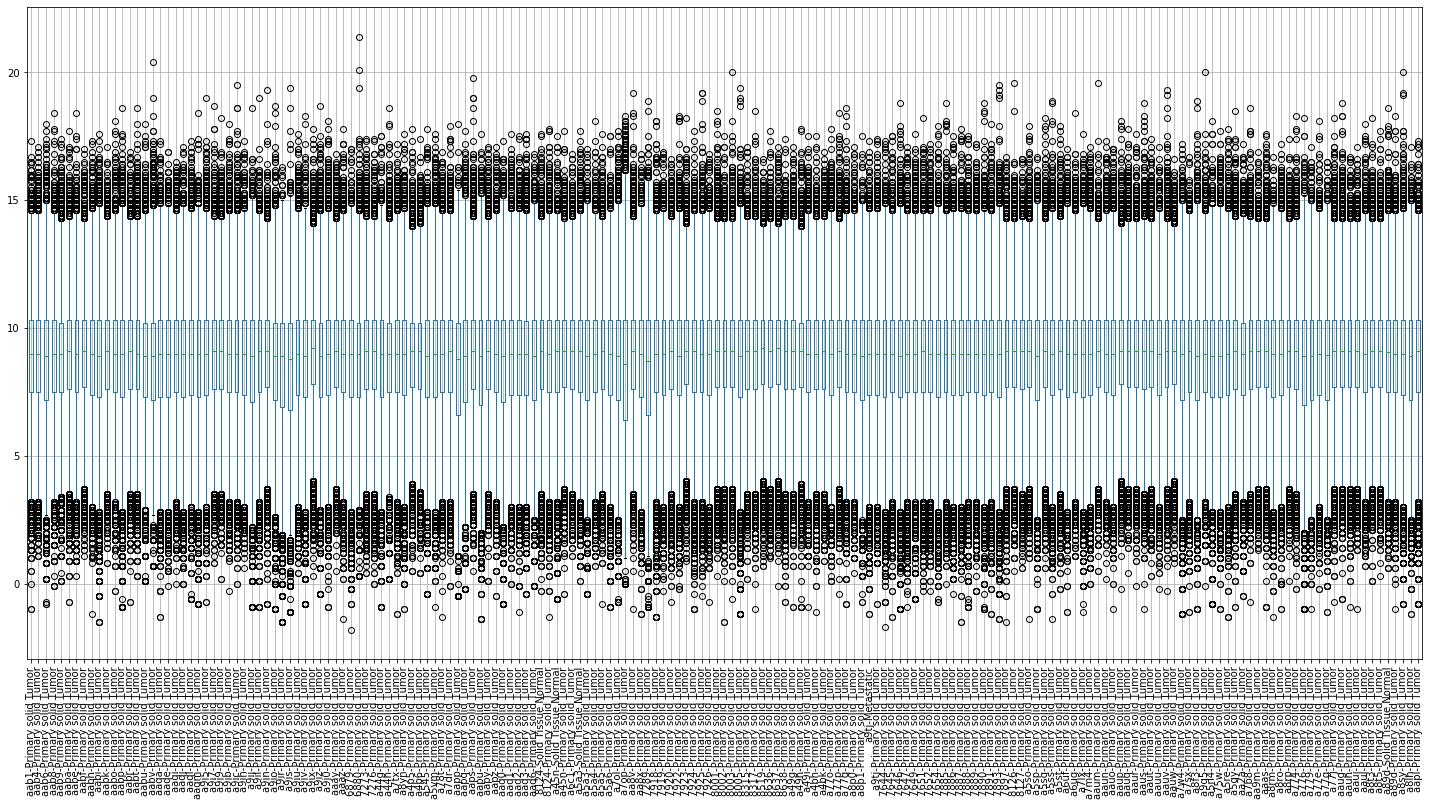

In [396]:
myFig = plt.figure(figsize=(25, 12));
#data.head()
boxplot = df_data.boxplot(column=cols,rot = 90)
plt.show()
#for i in range(50,201,50):
#    if i == 200:
#        #print("i = 200")
#        i = 183
#    boxplot = a.boxplot(column=cols[d:i],rot = 90)
#    myFig.savefig("boxplot {}.png".format(i),bbox_inches = "tight")
#    d = i + 1

## PCA Plot

Text(0, 0.5, 'component 2')

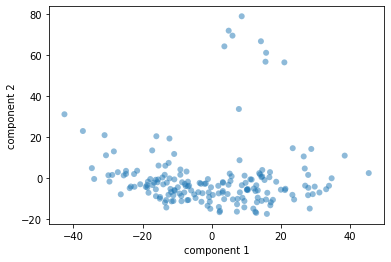

In [429]:
cols = df_data.head(0)
cols = (list(cols))
x = df_data.loc[:, cols].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x.T)
fig = plt.figure()
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')

In [430]:
pca.explained_variance_

array([297.41397, 269.77094], dtype=float32)

In [431]:
pca.explained_variance_ratio_

array([0.15838037, 0.14365977], dtype=float32)

In [432]:
import numpy as np
arrr = np.reshape(df_col["histological_type_other"].values,(len(df_col["histological_type_other"].values),1))

In [433]:
df2 = pd.DataFrame(arrr)

In [434]:
finalDf = pd.concat([principalDf, df2], axis = 1)

In [435]:
finalDf.head()
finalDf.columns = ['principal component 1', 'principal component 2','target']
finalDf.head()

,principal component 1,principal component 2,target
0,-10.684357,-5.995142,invasive adenocarcinoma
1,-6.519260,-3.531383,"invasive, well-differentiated"
2,-7.748497,-2.708213,NaN
3,-8.714298,-11.086408,NaN
4,4.894309,-3.071839,NaN


In [436]:
my_data_t = df_data.T

In [437]:
my_data_t.head()

rid,A1BG,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,AAMP,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,6.4,7.5,14.3,10.6,9.4,10.2,4.8,10.2,9.6,11.8,...,8.6,8.1,8.6,6.2,9.0,9.9,9.2,12.9,10.1,9.3
aab4-Primary solid Tumor,5.8,6.8,14.0,10.2,9.1,10.3,6.3,10.4,9.8,11.4,...,8.7,8.1,8.8,5.8,8.5,10.0,9.3,12.4,9.8,8.9
aab6-Primary solid Tumor,6.4,7.3,13.1,10.1,9.7,9.2,5.9,9.9,9.8,11.1,...,8.8,8.4,9.1,3.9,8.1,10.0,9.4,13.5,9.8,9.2
aab8-Primary solid Tumor,5.8,7.5,13.8,8.6,9.6,9.4,6.4,10.5,9.2,11.6,...,8.6,8.6,8.9,5.2,8.5,9.7,9.4,12.5,9.7,9.3
aab9-Primary solid Tumor,6.7,7.4,14.6,10.1,9.8,9.3,6.5,10.1,9.8,11.2,...,8.9,8.2,8.4,5.9,8.6,9.9,9.3,13.0,10.1,9.2


In [438]:
my_data_t.shape

(183, 14098)

In [439]:
#df_col["histological_type_other"]

In [440]:
df_new = my_data_t.join(df_col["histological_type_other"])

In [441]:
df_new.head()

,A1BG,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,AAMP,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,histological_type_other
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,6.4,7.5,14.3,10.6,9.4,10.2,4.8,10.2,9.6,11.8,...,8.1,8.6,6.2,9.0,9.9,9.2,12.9,10.1,9.3,invasive adenocarcinoma
aab4-Primary solid Tumor,5.8,6.8,14.0,10.2,9.1,10.3,6.3,10.4,9.8,11.4,...,8.1,8.8,5.8,8.5,10.0,9.3,12.4,9.8,8.9,"invasive, well-differentiated"
aab6-Primary solid Tumor,6.4,7.3,13.1,10.1,9.7,9.2,5.9,9.9,9.8,11.1,...,8.4,9.1,3.9,8.1,10.0,9.4,13.5,9.8,9.2,NaN
aab8-Primary solid Tumor,5.8,7.5,13.8,8.6,9.6,9.4,6.4,10.5,9.2,11.6,...,8.6,8.9,5.2,8.5,9.7,9.4,12.5,9.7,9.3,NaN
aab9-Primary solid Tumor,6.7,7.4,14.6,10.1,9.8,9.3,6.5,10.1,9.8,11.2,...,8.2,8.4,5.9,8.6,9.9,9.3,13.0,10.1,9.2,NaN


In [442]:
target_names = df_new["histological_type_other"]
labels = list(set(target_names.tolist()))


In [443]:
user_colors = {}
sub_str = "neuroendocrine"
step_size = (256**3) // len(labels)
for i, user in enumerate(labels):
    if str(user).find(sub_str) == -1:
        user_colors[user] = "green"
    else:
        user_colors[user] = "red"
#print(user_colors)

In [444]:
colors_dict = [user_colors[user] for user in labels]
#print(colors_dict)
#cvec = [colors_dict[label] for label in labels]

## PCA Plot with metadata column ‘histological_type_other’  (RED denotes Neuroendocrine)

<Figure size 432x288 with 0 Axes>

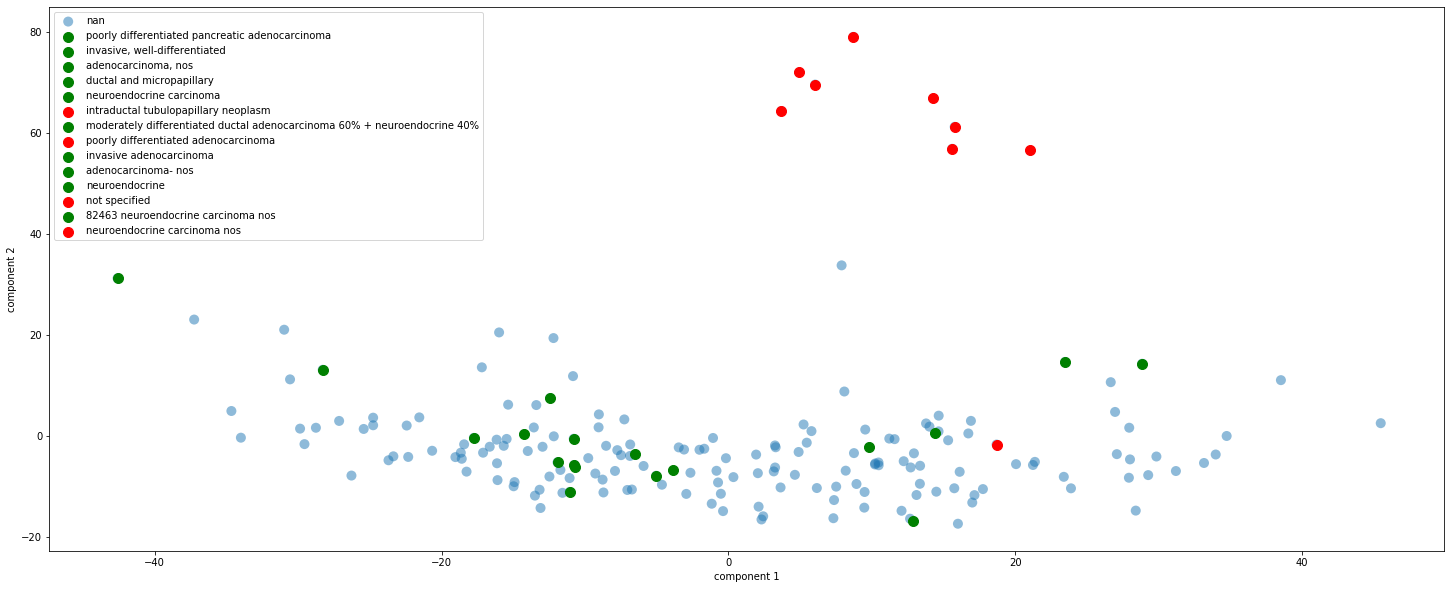

In [445]:
fig = plt.figure()
fig,ax=plt.subplots(figsize=(25,10))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            edgecolor='none', alpha=0.5,s=100)
plt.xlabel('component 1')
plt.ylabel('component 2')
targets = labels

for target, color in zip(targets,colors_dict):
    #print(color)
    indicesToKeep = finalDf['target'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 100)
ax.legend(targets)

In [446]:
df_new.head()

,A1BG,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,AAMP,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,histological_type_other
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,6.4,7.5,14.3,10.6,9.4,10.2,4.8,10.2,9.6,11.8,...,8.1,8.6,6.2,9.0,9.9,9.2,12.9,10.1,9.3,invasive adenocarcinoma
aab4-Primary solid Tumor,5.8,6.8,14.0,10.2,9.1,10.3,6.3,10.4,9.8,11.4,...,8.1,8.8,5.8,8.5,10.0,9.3,12.4,9.8,8.9,"invasive, well-differentiated"
aab6-Primary solid Tumor,6.4,7.3,13.1,10.1,9.7,9.2,5.9,9.9,9.8,11.1,...,8.4,9.1,3.9,8.1,10.0,9.4,13.5,9.8,9.2,NaN
aab8-Primary solid Tumor,5.8,7.5,13.8,8.6,9.6,9.4,6.4,10.5,9.2,11.6,...,8.6,8.9,5.2,8.5,9.7,9.4,12.5,9.7,9.3,NaN
aab9-Primary solid Tumor,6.7,7.4,14.6,10.1,9.8,9.3,6.5,10.1,9.8,11.2,...,8.2,8.4,5.9,8.6,9.9,9.3,13.0,10.1,9.2,NaN


In [447]:
df_new = df_new.dropna()
df_new.head()
df_new.shape

(27, 14099)

In [448]:
adenocarcinoma_df = df_new.loc[df_new["histological_type_other"].str.contains("neuroendocrine")==False]

In [449]:
adenocarcinoma_df.shape

(18, 14099)

In [450]:
adenocarcinoma_df.head()

,A1BG,A2LD1,A2M,A4GALT,AAAS,AACS,AADAT,AAGAB,AAK1,AAMP,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,histological_type_other
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,6.4,7.5,14.3,10.6,9.4,10.2,4.8,10.2,9.6,11.8,...,8.1,8.6,6.2,9.0,9.9,9.2,12.9,10.1,9.3,invasive adenocarcinoma
aab4-Primary solid Tumor,5.8,6.8,14.0,10.2,9.1,10.3,6.3,10.4,9.8,11.4,...,8.1,8.8,5.8,8.5,10.0,9.3,12.4,9.8,8.9,"invasive, well-differentiated"
aabh-Primary solid Tumor,5.7,8.0,13.9,8.4,9.0,9.7,5.4,9.7,9.7,11.8,...,7.3,8.6,6.4,9.4,9.8,8.9,12.7,10.0,8.8,invasive adenocarcinoma
aabi-Primary solid Tumor,6.3,5.8,11.9,7.9,9.3,9.1,4.1,9.8,10.5,12.0,...,8.4,9.2,5.6,9.0,10.7,8.3,12.5,9.9,8.6,poorly differentiated adenocarcinoma
6879-Primary solid Tumor,4.5,6.3,12.9,7.3,9.3,10.2,5.3,9.5,10.0,11.6,...,7.9,9.2,5.9,9.9,9.7,9.6,11.8,10.1,9.7,"adenocarcinoma, nos"


In [451]:
from GSVA import gsva, gmt_to_dataframe

In [452]:
file1 = open("Copy of type1_IFN.txt","r") 


In [453]:
geneset_data = file1.readlines()

In [454]:
len(geneset_data)

25

In [455]:
gene_list = []
for data_gen in geneset_data:
    d = data_gen.split('\n')
    gene_list.append(d[0])

In [456]:
genesets_df = pd.DataFrame(gene_list)
genesets_df.columns = ["Genes"]
genesets_df.set_index('Genes')
genesets_df.head()

,Genes
0,IFIT1
1,IFI44
2,IFIT3
3,MX2
4,OAS1


In [457]:
expression_df=adenocarcinoma_df
expression_df.T.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,6879-Primary solid Tumor,a45n-Solid Tissue Normal,a45n-Primary solid Tumor,a6c1-Primary solid Tumor,a7op-Primary solid Tumor,7289-Primary solid Tumor,8519-Primary solid Tumor,a4bk-Primary solid Tumor,a77p-Primary solid Tumor,a77q-Primary solid Tumor,a9tj-Metastatic,a9tj-Primary solid Tumor,a7b8-Primary solid Tumor,a77e-Primary solid Tumor
A1BG,6.4,5.8,5.7,6.3,4.5,7.2,7.1,7.2,5.9,5.2,7.9,6.7,6,6.4,5.9,6,7.4,6.7
A2LD1,7.5,6.8,8,5.8,6.3,6.8,6.4,6.7,9.3,6.3,7.7,6,6.6,6.8,7.5,7.3,7,7.1
A2M,14.3,14,13.9,11.9,12.9,13.6,14.5,13.7,12,10.1,14.7,14,14.6,14.6,12.8,13.8,14.1,13.9
A4GALT,10.6,10.2,8.4,7.9,7.3,8.7,9,9,7.2,10,8.4,9.5,9.8,10.7,8,8.1,8.3,10
AAAS,9.4,9.1,9,9.3,9.3,10,9.6,8.9,9,10,8.9,9.8,9.3,8.9,9.3,9.2,9.6,9.2


In [458]:
new_df = gsva(expression_df,genesets_df)

KeyError: 'member'